In [1]:
# Plotting notebook for the project
# Imports
import argparse
import os
import sys
import glob
import re

# Third-party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
from datetime import datetime
import scipy.stats as stats

# import cdo
from cdo import *
cdo = Cdo()

# Local imports
sys.path.append('/home/users/benhutch/skill-maps')
import dictionaries as dic
import functions as fnc

In [2]:
# for the GIF plots
# !pip install Pillow
# from PIL import Image

In [3]:
# Set up the arguments to be used
# Defined globally in this notebook
variable = "psl"
region = "north-atlantic"
season = "DJFM"
forecast_range = "2-9"

In [4]:
# Load the model data
datasets = fnc.load_data(dic.base_dir, dic.models, variable, region, forecast_range, season)

Searching for files in  /home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/north-atlantic/years_2-9/DJFM/outputs/mergetime/*.nc
Files for BCC-CSM2-MR: ['/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_north-atlantic_2-9_DJFM-r6i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_north-atlantic_2-9_DJFM-r5i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_north-atlantic_2-9_DJFM-r7i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_north-atlantic_2-9_DJFM-r2i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_north-atla

In [5]:
# Process the model data
variable_data, model_time = fnc.process_data(datasets, variable)

Dataset type: <class 'dict'>


In [6]:
# Choose the obs path based on the variable
if variable == "psl":
    obs_path = dic.obs_psl_na
elif variable == "tas":
    obs_path = dic.obs_tas
elif variable == "sfcWind":
    obs_path = dic.obs_sfcWind
elif variable == "rsds":
    obs_path = dic.obs_rsds
else:
    print("Error: variable not found")
    sys.exit()

# choose the obs var name based on the variable
if variable == "psl":
    obs_var_name = "psl"
elif variable == "tas":
    obs_var_name = "tas"
elif variable == "sfcWind":
    obs_var_name = "sfcWind"
elif variable == "rsds":
    obs_var_name = "rsds"
else:
    print("Error: variable not found")
    sys.exit()

In [7]:
# # Process the observations
obs = fnc.process_observations(variable, region, dic.north_atlantic_grid_obs, 
                               forecast_range, season, dic.obs, obs_var_name)

File already exists
Forecast range: 2 - 9
Rolling mean range: 8


In [8]:
obs.values

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

In [9]:
# # # check the values of obs
# obs["var151"]

# # count how many value are NaN
# nan_count = np.isnan(obs["var151"]).sum()

# print(nan_count.values)

# # count how many values are not NaN
# not_nan_count = np.count_nonzero(obs["var151"])

# print(not_nan_count)

# # calculate the percentage of NaN values
# nan_percentage = nan_count / (nan_count + not_nan_count) * 100

# # # print the percentage of NaN values
# # print("Percentage of NaN values in obs: ", nan_percentage)

In [10]:
rfield, pfield, obs_lons_converted, lons_converted = fnc.calculate_spatial_correlations(obs, variable_data, dic.models, variable)

extracting data for model: BCC-CSM2-MR
extracting data for model: MPI-ESM1-2-HR
extracting data for model: CanESM5
extracting data for model: CMCC-CM2-SR5
extracting data for model: HadGEM3-GC31-MM
extracting data for model: EC-Earth3
extracting data for model: MPI-ESM1-2-LR
extracting data for model: FGOALS-f3-L
extracting data for model: MIROC6
extracting data for model: IPSL-CM6A-LR
extracting data for model: CESM1-1-CAM5-CMIP5
extracting data for model: NorCPM1
var name for obs msl
Correlation coefficients range from -0.469 to 0.625
P-values range from 0.000 to 0.999


In [11]:
# # print the rfield
# # print(rfield)
# # visualise the distribution of r values
# # as a histogram
# plt.hist(rfield, bins=20)

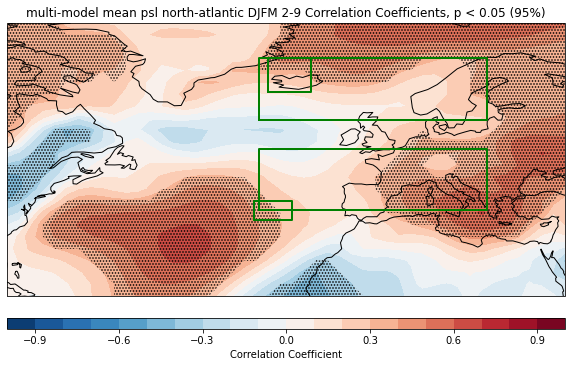

In [12]:
# # Call the function to plot the spatial correlations of these
fnc.plot_correlations(dic.models, rfield, pfield, obs, variable, region, season, forecast_range, dic.plots_dir, obs_lons_converted, lons_converted, dic.azores_grid, dic.iceland_grid, dic.uk_n_box, dic.uk_s_box)

Processing model: BCC-CSM2-MR
extracting data for model: BCC-CSM2-MR
var name for obs msl
Correlation coefficients range from -0.194 to 0.613
P-values range from 0.000 to 1.000
Processing model: MPI-ESM1-2-HR
extracting data for model: MPI-ESM1-2-HR
var name for obs msl
Correlation coefficients range from -0.400 to 0.592
P-values range from 0.000 to 1.000
Processing model: CanESM5
extracting data for model: CanESM5
var name for obs msl
Correlation coefficients range from -0.567 to 0.587
P-values range from 0.000 to 0.996
Processing model: CMCC-CM2-SR5
extracting data for model: CMCC-CM2-SR5
var name for obs msl
Correlation coefficients range from -0.369 to 0.515
P-values range from 0.000 to 1.000
Processing model: HadGEM3-GC31-MM
extracting data for model: HadGEM3-GC31-MM
var name for obs msl
Correlation coefficients range from -0.541 to 0.464
P-values range from 0.000 to 0.998
Processing model: EC-Earth3
extracting data for model: EC-Earth3
var name for obs msl
Correlation coefficient

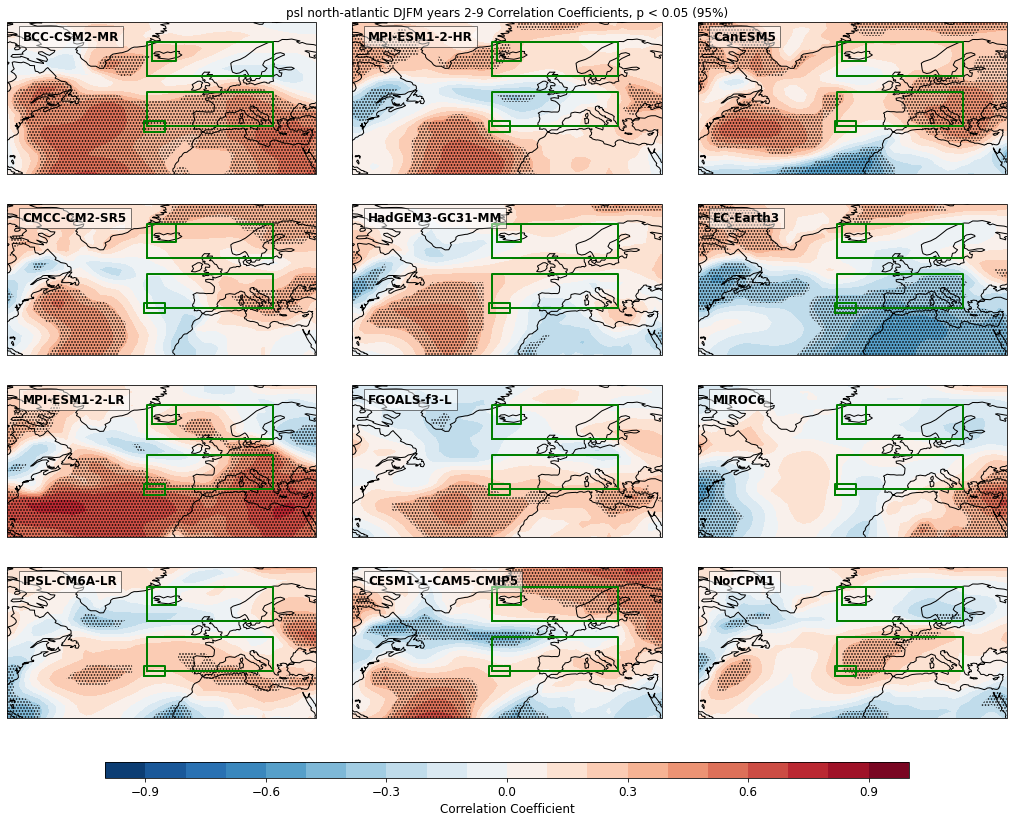

In [13]:
# Test the new function which plots the spatial correlations as subplots
# For all of the models
fnc.plot_correlations_subplots(dic.models, obs, variable_data, variable, region, season, forecast_range, dic.plots_dir, dic.azores_grid, dic.iceland_grid, dic.uk_n_box, dic.uk_s_box)

In [14]:
# Now globally
# Need to process the model data first
region = "global"

In [15]:
# Load the model data
# Now for the global region
datasets = fnc.load_data(dic.base_dir, dic.models, variable, region, forecast_range, season)

Searching for files in  /home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/*.nc
Files for BCC-CSM2-MR: ['/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-9_DJFM-r3i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-9_DJFM-r7i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-9_DJFM-r6i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-9_DJFM-r4i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-9_DJFM-r2i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/

In [16]:
# Process the model data
# Again, this is for the global region
variable_data, model_time = fnc.process_data(datasets, variable)

Dataset type: <class 'dict'>


In [17]:
# Choose the obs path based on the variable
if variable == "psl":
    obs_path = dic.obs_psl_na
elif variable == "tas":
    obs_path = dic.obs_tas
elif variable == "sfcWind":
    obs_path = dic.obs_sfcWind
elif variable == "rsds":
    obs_path = dic.obs_rsds
else:
    print("Error: variable not found")
    sys.exit()

# choose the obs var name based on the variable
if variable == "psl":
    obs_var_name = "psl"
elif variable == "tas":
    obs_var_name = "tas"
elif variable == "sfcWind":
    obs_var_name = "sfcWind"
elif variable == "rsds":
    obs_var_name = "rsds"
else:
    print("Error: variable not found")
    sys.exit()

In [18]:
# Process the observations
# For the global region
# # Process the observations
# This function doesn't select the region, so no need to worry about the dic. variable
obs = fnc.process_observations(variable, region, dic.north_atlantic_grid_obs, 
                               forecast_range, season, dic.obs, obs_var_name)

File already exists
Forecast range: 2 - 9
Rolling mean range: 8


In [19]:
obs

<xarray.DataArray 'msl' (time: 65, lat: 72, lon: 144)>
dask.array<truediv, shape=(65, 72, 144), dtype=float64, chunksize=(8, 72, 144), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1959-12-31 1960-12-31 ... 2023-12-31
  * lon      (lon) float64 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 80.0 82.5 85.0 87.5

In [20]:
# Calculate the r and p fields for the global region
rfield, pfield, obs_lons_converted, lons_converted = fnc.calculate_spatial_correlations(obs, variable_data, dic.models, variable)

extracting data for model: BCC-CSM2-MR
extracting data for model: MPI-ESM1-2-HR
extracting data for model: CanESM5
extracting data for model: CMCC-CM2-SR5
extracting data for model: HadGEM3-GC31-MM
extracting data for model: EC-Earth3
extracting data for model: MPI-ESM1-2-LR
extracting data for model: FGOALS-f3-L
extracting data for model: MIROC6
extracting data for model: IPSL-CM6A-LR
extracting data for model: CESM1-1-CAM5-CMIP5
extracting data for model: NorCPM1
var name for obs msl
Correlation coefficients range from -0.697 to 0.968
P-values range from 0.000 to 0.999


In [21]:
# # Plot the model and obs data to have a look at the data
# fnc.plot_model_data(variable_data, obs, dic.test_model_bcc, dic.gif_plots_dir)

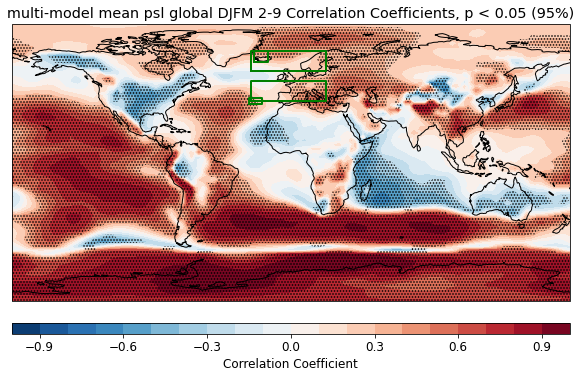

In [22]:
# Plot the global multi-model spatial correlations
# # Call the function to plot the spatial correlations of these
fnc.plot_correlations(dic.models, rfield, pfield, obs, variable, region, season, forecast_range, dic.plots_dir, obs_lons_converted, lons_converted, dic.azores_grid, dic.iceland_grid, dic.uk_n_box, dic.uk_s_box)

In [ ]:
# Now for the global individual model subplots
# Test the new function which plots the spatial correlations as subplots
# For all of the models
fnc.plot_correlations_subplots(dic.models, obs, variable_data, variable, region, season, forecast_range, dic.plots_dir, dic.azores_grid, dic.iceland_grid, dic.uk_n_box, dic.uk_s_box)

Processing model: BCC-CSM2-MR
extracting data for model: BCC-CSM2-MR
var name for obs msl
Correlation coefficients range from -0.660 to 0.889
P-values range from 0.000 to 1.000
Processing model: MPI-ESM1-2-HR
extracting data for model: MPI-ESM1-2-HR
var name for obs msl
Correlation coefficients range from -0.771 to 0.947
P-values range from 0.000 to 1.000
Processing model: CanESM5
extracting data for model: CanESM5
var name for obs msl
Correlation coefficients range from -0.798 to 0.952
P-values range from 0.000 to 0.999
Processing model: CMCC-CM2-SR5
extracting data for model: CMCC-CM2-SR5
var name for obs msl
Correlation coefficients range from -0.575 to 0.902
P-values range from 0.000 to 1.000
Processing model: HadGEM3-GC31-MM
extracting data for model: HadGEM3-GC31-MM
var name for obs msl
Correlation coefficients range from -0.671 to 0.945
P-values range from 0.000 to 0.999
Processing model: EC-Earth3
extracting data for model: EC-Earth3
var name for obs msl
Correlation coefficient

In [ ]:
# Now for the year range 2-5
# Plot the skill for the global region first
# Make sure that the variables are set up correctly
variable = "psl"
region = "global"
season = "DJFM"
forecast_range = "2-5"

In [ ]:
# Load the data
# For the global region, years 2-5, DJFM
datasets = fnc.load_data(dic.base_dir, dic.models, variable, region, forecast_range, season)

In [ ]:
# Process the model data
variable_data, model_time = fnc.process_data(datasets, variable)

In [ ]:
# Choose the obs path based on the variable
if variable == "psl":
    obs_path = dic.obs_psl_na
elif variable == "tas":
    obs_path = dic.obs_tas
elif variable == "sfcWind":
    obs_path = dic.obs_sfcWind
elif variable == "rsds":
    obs_path = dic.obs_rsds
else:
    print("Error: variable not found")
    sys.exit()

# choose the obs var name based on the variable
if variable == "psl":
    obs_var_name = "psl"
elif variable == "tas":
    obs_var_name = "tas"
elif variable == "sfcWind":
    obs_var_name = "sfcWind"
elif variable == "rsds":
    obs_var_name = "rsds"
else:
    print("Error: variable not found")
    sys.exit()

In [ ]:
# Process the observations for the global region and year 2-5 mean
# Check that the output is doing what we expect
obs = fnc.process_observations(variable, region, dic.north_atlantic_grid_obs,
                               forecast_range, season, dic.obs, obs_var_name)

In [ ]:
# Check that the obs looks like we expect it to
obs

In [ ]:
# Calculate the r and p fields for the global region, year 2-9 mean
rfield, pfield, obs_lons_converted, lons_converted = fnc.calculate_spatial_correlations(
    obs, variable_data, dic.models, variable
)

In [ ]:
# Plot the correlations for the global region, year 2-9 mean
# Multi-model mean
fnc.plot_correlations(dic.models, rfield, pfield, obs, variable, region, season,
                      forecast_range, dic.plots_dir, obs_lons_converted, lons_converted,
                      dic.azores_grid, dic.iceland_grid, dic.uk_n_box, dic.uk_s_box)

In [ ]:
# Now for the individual models
fnc.plot_correlations_subplots(dic.models, obs, variable_data, variable, region, season,
                                forecast_range, dic.plots_dir, dic.azores_grid, dic.iceland_grid,
                                  dic.uk_n_box, dic.uk_s_box)

In [ ]:
# Set up the variables for the obs processing function
# For the new run of the model years 2-3
variable = "psl"
region = "global"
region_grid = dic.gridspec_global
forecast_range = "2-3"
season = "DJFM"
observations_path = dic.obs
obs_var_name = "psl"

In [ ]:
# Call the processing obs function
obs = fnc.process_observations(variable, region, region_grid, forecast_range, season, observations_path, obs_var_name)

In [ ]:
# Have a look at the obs
obs

In [ ]:
# Load the data
datasets = fnc.load_data(dic.base_dir, dic.models, variable, region, forecast_range, season)

In [ ]:
# Process the model data
variable_data, model_time = fnc.process_data(datasets, variable)

In [ ]:
# Calculate the r and p fields for the global region, year 2-3 mean
rfield, pfield, obs_lons_converted, lons_converted = fnc.calculate_spatial_correlations(
    obs, variable_data, dic.models, variable
)

In [ ]:
# Plot the correlations for the global region, year 2-3 mean
fnc.plot_correlations(dic.models, rfield, pfield, obs, variable, region, season,
                      forecast_range, dic.plots_dir, obs_lons_converted, lons_converted,
                      dic.azores_grid, dic.iceland_grid, dic.uk_n_box, dic.uk_s_box)

In [ ]:
# Now for the individual models for the global region, years 2-3 mean
fnc.plot_correlations_subplots(dic.models, obs, variable_data, variable, region, season,
                                forecast_range, dic.plots_dir, dic.azores_grid, dic.iceland_grid,
                                  dic.uk_n_box, dic.uk_s_box)

In [ ]:
# Set up the variables for processing the obs
# for the year ahead run of the model years 2-2
variable = "psl"
region = "global"
region_grid = dic.gridspec_global
forecast_range = "2-2"
season = "DJFM"
observations_path = dic.obs
obs_var_name = "psl"

In [ ]:
# Call the processing obs function
# for the year ahead 2-2 run
obs = fnc.process_observations(variable, region, region_grid,
                               forecast_range, season, observations_path,
                               obs_var_name)

In [ ]:
# have a look at the obs
# watch out for the time dimension here - obs years need to line up with the model output
obs.values

In [ ]:
obs.time

In [ ]:
# Load the data
datasets = fnc.load_data(dic.base_dir, dic.models, variable, 
                         region, forecast_range, season)

In [ ]:
# process the model data
variable_data, model_time = fnc.process_data(datasets, variable)

In [ ]:
# Calculate the r and p field for the global region, year 2-2 mean
rfield, pfield, obs_lons_converted, lons_converted = fnc.calculate_spatial_correlations(
    obs, variable_data, dic.models, variable
)

In [ ]:
# Plot the correlations for the global region, year 2-2 mean, multi-model mean
fnc.plot_correlations(dic.models, rfield, pfield, obs, variable, region, season,
                      forecast_range, dic.plots_dir, obs_lons_converted, lons_converted,
                      dic.azores_grid, dic.iceland_grid, dic.uk_n_box, dic.uk_s_box)

In [ ]:
# Now for the individual models for the global region, years 2-2 mean
# This is for the individual models
fnc.plot_correlations_subplots(dic.models, obs, variable_data, variable, region, season,
                                forecast_range, dic.plots_dir, dic.azores_grid, dic.iceland_grid,
                                  dic.uk_n_box, dic.uk_s_box)

In [ ]:
# Set up the parameters for the next run
# first years 2-9 SON psl
variable = "psl"
region = "global"
region_grid = dic.gridspec_global
forecast_range = "2-9"
season = "SON"
observations_path = dic.obs
obs_var_name = "psl"

# Process the observations
obs = fnc.process_observations(variable, region, region_grid,
                               forecast_range, season, observations_path,
                               obs_var_name)

In [ ]:
# Load the model data
# WATCH for month names, SON is okay in this case
# Load the data
datasets = fnc.load_data(dic.base_dir, dic.models, variable, 
                         region, forecast_range, season)

# Process the model data
variable_data, model_time = fnc.process_data(datasets, variable)

In [ ]:
# calculate the r and p fields for the year 2-9 SON psl run
rfield, pfield, obs_lons_converted, lons_converted = fnc.calculate_spatial_correlations(
    obs, variable_data, dic.models, variable
)

In [ ]:
# Plot the correlations
# year 2-9 psl SON
fnc.plot_correlations(dic.models, rfield, pfield, obs, variable, region, season,
                      forecast_range, dic.plots_dir, obs_lons_converted, lons_converted,
                      dic.azores_grid, dic.iceland_grid, dic.uk_n_box, dic.uk_s_box)

In [ ]:
# Now plot the individual model correlations
# year 2-9 psl SON
fnc.plot_correlations_subplots(dic.models, obs, variable_data, variable, region, season,
                                forecast_range, dic.plots_dir, dic.azores_grid, dic.iceland_grid,
                                  dic.uk_n_box, dic.uk_s_box)

In [ ]:
# Set up the parameters again
# for the years 2-9 psl ULG (JJA)
variable = "psl"
region = "global"
region_grid = dic.gridspec_global
forecast_range = "2-9"
model_season = "ULG" # weird season name for model
obs_season = "JJA" # normal season name for obs
observations_path = dic.obs
obs_var_name = "psl"


# Process the observations
obs = fnc.process_observations(variable, region, region_grid,
    forecast_range, obs_season, observations_path,
    obs_var_name)

In [ ]:
# Load the model data
# using the model seasons
# Load the data
datasets = fnc.load_data(dic.base_dir, dic.models, variable, 
                         region, forecast_range, model_season)

# Process the model data
variable_data, model_time = fnc.process_data(datasets, variable)

In [ ]:
# Calculate the r and p fields
# years 2-9 psl ULG/JJA
rfield, pfield, obs_lons_converted, lons_converted = fnc.calculate_spatial_correlations(
    obs, variable_data, dic.models, variable
)

In [ ]:
# Plot the spatial correlations
# Use the obs_season = JJA here as a title
fnc.plot_correlations(dic.models, rfield, pfield, obs, variable, region, obs_season,
                      forecast_range, dic.plots_dir, obs_lons_converted, lons_converted,
                      dic.azores_grid, dic.iceland_grid, dic.uk_n_box, dic.uk_s_box)


In [ ]:
# Now plot the individual model correlations 
# year 2-9 JJA/ULG psl
# be sure to use obs_season (JJA) here again
fnc.plot_correlations_subplots(dic.models, obs, variable_data, variable, region, obs_season,
                                forecast_range, dic.plots_dir, dic.azores_grid, dic.iceland_grid,
                                  dic.uk_n_box, dic.uk_s_box)

In [ ]:
# # Now set up the parameters for the corrected MAY run
# # year 2-9 psl MAY (MAM) - currently running
# variable = "psl"
# region = "global"
# region_grid = dic.gridspec_global
# forecast_range = "2-9"
# model_season = "MAY" # weird season name for model
# obs_season = "MAM" # normal season name for obs
# observations_path = dic.obs
# obs_var_name = "psl"


# # Process the observations
# obs = fnc.process_observations(variable, region, region_grid,
#     forecast_range, obs_season, observations_path,
#     obs_var_name)

In [ ]:
# # Load the model data
# # using the model seasons
# # Load the data
# datasets = fnc.load_data(dic.base_dir, dic.models, variable, 
#                          region, forecast_range, model_season)

# # Process the model data
# variable_data, model_time = fnc.process_data(datasets, variable)

In [ ]:
# # Calculate the r and p fields
# # years 2-9 psl MAY/MAM
# rfield, pfield, obs_lons_converted, lons_converted = fnc.calculate_spatial_correlations(
#     obs, variable_data, dic.models, variable
# )

In [ ]:
# # Plot the spatial correlations
# # Use the obs_season = MAM here as a title
# fnc.plot_correlations(dic.models, rfield, pfield, obs, variable, region, obs_season,
#                       forecast_range, dic.plots_dir, obs_lons_converted, lons_converted,
#                       dic.azores_grid, dic.iceland_grid, dic.uk_n_box, dic.uk_s_box)


In [ ]:
# # Now plot the individual model correlations 
# # year 2-9 MAM/MAY psl
# # be sure to use obs_season (MAM) here again
# fnc.plot_correlations_subplots(dic.models, obs, variable_data, variable, region, obs_season,
#                                 forecast_range, dic.plots_dir, dic.azores_grid, dic.iceland_grid,
#                                   dic.uk_n_box, dic.uk_s_box)